In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

from KNN import KNN

## Zadanie 7. (3 punkty)
Porównaj skuteczność klasyfikatora KNN działającego na oryginalnym zestawie danych zawierającym obrazy cyfr pisanych ręcznie (użytym w skrypcie z poprzedniego zadania) ze skutecznością klasyfikatorów KNN działających na zestawach danych zredukowanych do dwóch wymiarów za pomocą metod PCA, KPCA, Isomap, LLE, MDS, t-SNE.

In [2]:
digits = datasets.load_digits()
X = digits.data
Y = digits.target
N, d = X.shape

df = pd.DataFrame({'data': [], 'k':[], 'mean_score': []})

In [3]:
ks = np.arange(1, 20, 2)

def cross_val_mean_score(data, title, no_splits=4):
    elems_in_split = len(data) // no_splits
    
    score = {k: 0 for k in ks}
    
    for i in range(no_splits):
        start_idx, stop_idx = i * elems_in_split, (i+1) * elems_in_split
        train_x = np.vstack((data[:start_idx], data[stop_idx:]))
        test_x = data[start_idx : stop_idx]
        train_y = np.append(Y[:start_idx], Y[stop_idx:])
        test_y = Y[start_idx : stop_idx]
        
        knn = KNN(train_x, train_y, test_x, ks)
        
        for k in ks:
            score[k] += np.count_nonzero(knn[k] == test_y) / len(test_y)
        
    for k in ks:
        df.loc[len(df)] = [title, k, score[k] / no_splits]

In [4]:
cross_val_mean_score(X, 'Original')

In [5]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
cross_val_mean_score(X_pca, 'PCA')

In [6]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
cross_val_mean_score(X_kpca, 'Kernel PCA')

In [7]:
X_iso = manifold.Isomap(n_neighbors=30, n_components=2).fit_transform(X)
cross_val_mean_score(X_iso, 'Isomap')

In [8]:
X_lle = manifold.LocallyLinearEmbedding(n_neighbors=30, n_components=2).fit_transform(X)
cross_val_mean_score(X_lle, 'Locally Linear Embedding')

In [9]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
cross_val_mean_score(X_mds, 'Multidimensional Scaling')

In [10]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
cross_val_mean_score(X_tsne, 't-distributed Stochastic Neighbor Embedding')

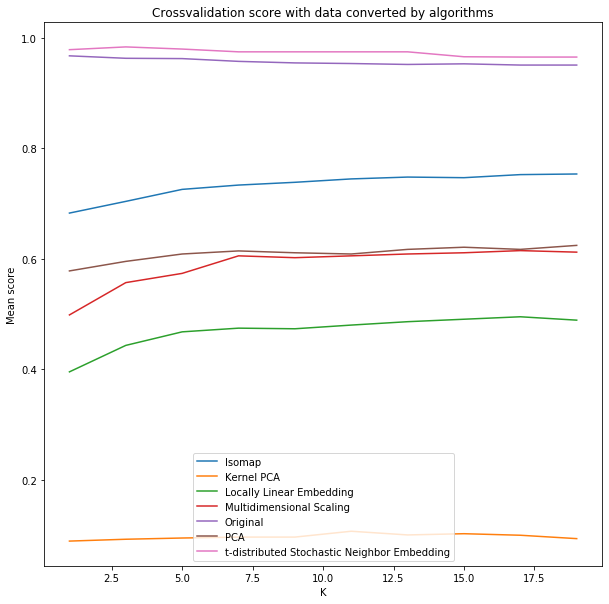

In [11]:
plt.figure(figsize=(10, 10))
plt.title('Crossvalidation score with data converted by algorithms')
plt.xlabel('K')
plt.ylabel('Mean score')
for data in np.unique(df['data']):
    rows = df[df['data'] == data]
    plt.plot(rows['k'], rows['mean_score'], label=data)
plt.legend()